This comes from a problem I have seen on reddit: 

What is the optimal number of items to keep on a shelf, given the following conditions:

1. Historically the items where sold with and average of 10 and standard deviation of 2.
2. Sold items generate a profit, unsold items which were on the shelf are discarded and generate a loss.
3. Use a montecarlo simulation to find the optimal number of items.

There are plenty of ways to do it. We can express revenues and losses separately, as I did here, or as a ratio to use only one variable. Anyway, this is a way to do it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,9)})

In [2]:
# Set variables for simulation

# historical average of items sold
avg = 10
# historical standard deviation for items sold
sd = 2
# Optional, number of days create a fictional distribution of sales and verify average and SD
num_days = 1
# how many simulations to run - note: in practice it's number of days * number of simulations
num_sim = 1000
# simulation for number of items for sale 
items_for_sale = avg + sd * 3

# profit for each single product sold
profit = 10
# losses for any product not sold and left on the shelf at the end of the day
loss = 50

In [3]:
# a function to calculate the revenues

def calc_revenue(x):
    """ Return the revenue given x number sold
    number of item sold will give profit if item is available
    or give a loss if item remain unsold but available"""
    if x >= w:
        revenue = w * profit
    else:
        diff = x - w
        revenue = x * profit + diff * loss
    return revenue    
        


Optimal number of items to keep on shelf and average revenues per day: 
   Items_for_Sale AVG_Revenue
8              8   70.709291


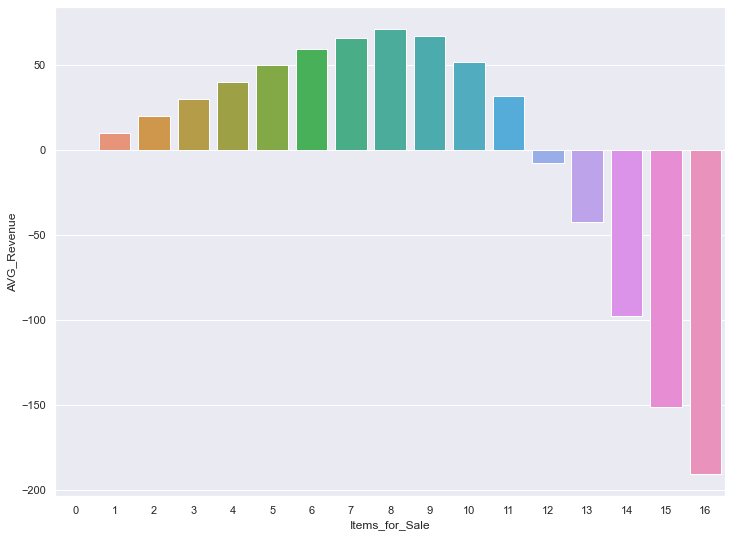

In [4]:
# initialize a dataframe to collect results
df = pd.DataFrame(columns = ['Items_for_Sale', 'AVG_Revenue'], index = range(items_for_sale + 1))


w = 0
total_revenue = []

while w <= items_for_sale:
    avg_rev = []
    j = 0
    while j <= num_sim:
        item_sold = np.random.default_rng().normal(avg, sd, num_days).round(0)
        j += 1
        total_revenue = []
        for i in item_sold:
            total_revenue.append(calc_revenue(i))
            # print("this is items sold: ", i, "and this is rolling average revenue: ", np.mean(total_revenue))
        avg_rev.append(np.mean(total_revenue))
        # print("this is sim # ",j ,"this is average revenue",  avg_rev)
    # print("this is number of items for sale ",w,"this is average revenue", np.mean(avg_rev))
    df.loc[w].Items_for_Sale = w
    df.loc[w].AVG_Revenue = np.mean(avg_rev)
    w += 1
    
    
sns.barplot(data = df, x = "Items_for_Sale", y = "AVG_Revenue")

print("Optimal number of items to keep on shelf and average revenues per day: \n", df.query('AVG_Revenue == AVG_Revenue.max()'))